In [33]:
import mlrose_hiive
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ast import literal_eval
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from mlrose_hiive import QueensGenerator, MaxKColorGenerator, TSPGenerator, ContinuousPeaksGenerator, FlipFlopGenerator, KnapsackGenerator
from mlrose_hiive import RHCRunner, SARunner, GARunner, MIMICRunner, SKMLPRunner

# Plot customization
plt.rcParams['axes.grid'] = True
plt.style.use('seaborn-colorblind')

In [34]:
SEED = 42
OUTPUT_DIRECTORY = 'results'

# Knapsack

In [35]:
problem = KnapsackGenerator.generate(seed=SEED, number_of_items_types=30,
                 max_item_count=15, max_weight_per_item=25,
                 max_value_per_item=10, max_weight_pct=0.6,
                 multiply_by_max_item_count=True)
experiment_name = 'Knapsack_15'

In [36]:
rhc = RHCRunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(10),
                max_attempts=5000,
                restart_list=[25, 75, 100])  
                
# the two data frames will contain the results
rhc_run_stats, rhc_run_curves = rhc.run()

In [37]:
rhc_run_curves

,Iteration,Time,Fitness,FEvals,Restarts,max_iters,current_restart
0,0,0.000249,1063.0,0.0,25,512,0
1,1,0.005264,1069.0,2.0,25,512,0
2,2,0.006932,1069.0,3.0,25,512,0
3,3,0.008437,1071.0,5.0,25,512,0
4,4,0.008464,1071.0,6.0,25,512,0
...,...,...,...,...,...,...,...
103934,508,0.046407,1398.0,53245.0,100,512,100
103935,509,0.046492,1398.0,53246.0,100,512,100
103936,510,0.046577,1398.0,53247.0,100,512,100
103937,511,0.046663,1398.0,53248.0,100,512,100


In [38]:
rhc_run_stats

,Iteration,Fitness,FEvals,Time,State,Restarts,max_iters,current_restart
0,0,1063.0,0,0.000249,"[6, 3, 12, 14, 10, 7, 12, 4, 6, 9, 2, 6, 10, 1...",25,512,0
1,1,1069.0,2,0.005264,"[12, 3, 12, 14, 10, 7, 12, 4, 6, 9, 2, 6, 10, ...",25,512,0
2,2,1069.0,3,0.006932,"[12, 3, 12, 14, 10, 7, 12, 4, 6, 9, 2, 6, 10, ...",25,512,0
3,4,1071.0,6,0.008464,"[12, 3, 12, 14, 10, 7, 12, 4, 6, 9, 2, 6, 10, ...",25,512,0
4,8,1230.0,14,0.009712,"[12, 3, 12, 14, 10, 7, 12, 4, 6, 12, 2, 6, 10,...",25,512,0
...,...,...,...,...,...,...,...,...
2228,32,1389.0,52768,519.329244,"[14, 10, 14, 13, 11, 7, 1, 10, 6, 1, 6, 11, 0,...",100,512,100
2229,64,1398.0,52801,519.956699,"[14, 10, 14, 13, 11, 7, 1, 10, 6, 1, 6, 11, 0,...",100,512,100
2230,128,1398.0,52865,520.876907,"[14, 10, 14, 13, 11, 7, 1, 10, 6, 1, 6, 11, 0,...",100,512,100
2231,256,1398.0,52993,522.395242,"[14, 10, 14, 13, 11, 7, 1, 10, 6, 1, 6, 11, 0,...",100,512,100


<AxesSubplot:>

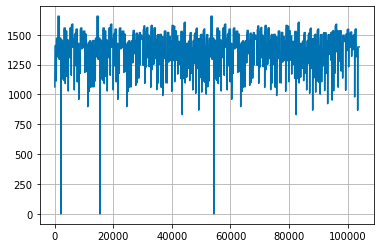

In [39]:
rhc_run_curves['Fitness'].plot()

In [40]:
sa = SARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(14),
                max_attempts=5000,
                temperature_list=[1, 10, 50, 100, 250, 500, 1000, 2500, 5000, 10000],
                decay_list=[mlrose_hiive.GeomDecay])
            
# the two data frames will contain the results
sa_run_stats, sa_run_curves = sa.run()

In [41]:
sa_run_curves

,Iteration,Time,Fitness,FEvals,Temperature,max_iters
0,0,0.000074,1063.0,0.0,1,8192
1,1,0.002765,1069.0,2.0,1,8192
2,2,0.004410,1069.0,3.0,1,8192
3,3,0.005767,1069.0,4.0,1,8192
4,4,0.005796,1090.0,6.0,1,8192
...,...,...,...,...,...,...
56970,6153,0.265177,1679.0,6753.0,10000,8192
56971,6154,0.265325,1679.0,6754.0,10000,8192
56972,6155,0.265474,1679.0,6755.0,10000,8192
56973,6156,0.265627,1679.0,6756.0,10000,8192


<AxesSubplot:>

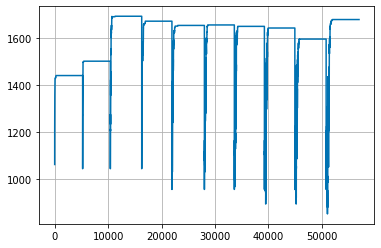

In [42]:
sa_run_curves['Fitness'].plot()

In [43]:
ga = GARunner(problem=problem,
                experiment_name=experiment_name,
                output_directory=OUTPUT_DIRECTORY,
                seed=SEED,
                iteration_list=2 ** np.arange(12),
                max_attempts=1000,
                population_sizes=[150, 200, 300],
                mutation_rates=[0.4, 0.5, 0.6])
                
# the two data frames will contain the results
ga_run_stats, ga_run_curves = ga.run()

In [44]:
ga_run_curves

,Iteration,Time,Fitness,FEvals,Population Size,Mutation Rate,max_iters
0,0,0.002346,1063.0,150.0,150,0.4,2048
1,1,0.007856,1494.0,302.0,150,0.4,2048
2,2,0.012576,1495.0,454.0,150,0.4,2048
3,3,0.017792,1495.0,605.0,150,0.4,2048
4,4,0.020960,1548.0,757.0,150,0.4,2048
...,...,...,...,...,...,...,...
12828,1161,0.100534,1900.0,349794.0,300,0.6,2048
12829,1162,0.103593,1900.0,350095.0,300,0.6,2048
12830,1163,0.106643,1900.0,350396.0,300,0.6,2048
12831,1164,0.109702,1900.0,350697.0,300,0.6,2048


<AxesSubplot:>

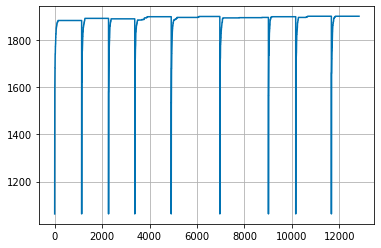

In [45]:
ga_run_curves['Fitness'].plot()

In [46]:
mmc = MIMICRunner(problem=problem,
                    experiment_name=experiment_name,
                    output_directory=OUTPUT_DIRECTORY,
                    seed=SEED,
                    iteration_list=2 ** np.arange(10),
                    max_attempts=500,
                    keep_percent_list=[0.25, 0.5, 0.75],
                    population_sizes=[150, 200, 300])          
# the two data frames will contain the results
mmc_run_stats, mmc_run_curves = mmc.run()

In [47]:
mmc_run_curves

,Iteration,Time,Fitness,FEvals,use_fast_mimic,Population Size,Keep Percent,max_iters
0,0,0.001794,1063.0,150.0,False,150,0.25,512
1,1,0.127921,1588.0,302.0,False,150,0.25,512
2,2,0.256220,1589.0,454.0,False,150,0.25,512
3,3,0.380756,1647.0,606.0,False,150,0.25,512
4,4,0.502678,1647.0,757.0,False,150,0.25,512
...,...,...,...,...,...,...,...,...
4606,508,54.829385,1789.0,153227.0,False,300,0.75,512
4607,509,0.001350,1789.0,153528.0,False,300,0.75,512
4608,510,0.123113,1789.0,153829.0,False,300,0.75,512
4609,511,0.252940,1789.0,154130.0,False,300,0.75,512


<AxesSubplot:>

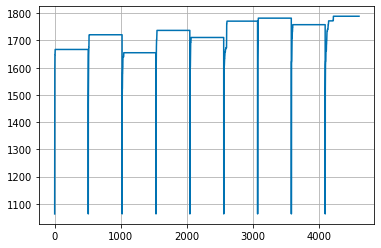

In [48]:
mmc_run_curves['Fitness'].plot()